# Ionization rates of Earth and Mars

The ionization rate $q$ at altitude $z$ is, for monoenergetic electrons of energy $E_p$, given by

\begin{equation}
q(z) = F\frac{E_p}{\Delta\varepsilon_{\text{ion}}}\Lambda\left(\frac{s}{R}\right)\frac{\rho(z)}{R(E_p)},
\end{equation}

where $F$ is the electron flux [cm$^{-2}$s$^{-2}$], $\Delta\varepsilon_{\text{ion}}\approx35$ [eV] is the energy loss per electron-ion pair formation, $\Lambda\left(\frac{s}{R}\right)$ is the energy dissipation distribution function, $s$ is the atmospheric scattering depth, $R$ is the energy specific stopping range, and $\rho$ is the atmosphere's total mass density.

The given variables/functions are:
$E_p$, $\Delta\varepsilon_{\text{ion}}$, $F$, and $\Lambda\left(\frac{s}{R}\right)$.

So what we need to do is:

i) calculate $R$ [g/cm$^2$] from the empirical formula
\begin{equation}
R(E)=4.30\times10^{-7}+5.36\times10^{-6}E^{1.67}
\end{equation}
where $E$ is in [keV].

ii) Calculate $\rho(z)$ for the atmospheres based on atmospheric models.

iii) Calculate the scattering depth $s(z)$
\begin{equation}
s(z)=\int_z^\infty \rho(z')dz'
\end{equation}

iv) Use $s$ and $R$ to calculate $\Lambda\left(\frac{s}{R}\right)$

v) Calculate $q(z)$

vi) Plot $q(z)$ for different electron energies.

In [1]:
# Import needed packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


Set up atmosphere class, should contain molecular composition and height.

Load earth atmosphere

In [2]:
height,O,N2,O2,He,Ar,H,N = np.genfromtxt("earth_data.txt", unpack=True, skip_header=1)



Generate martian atmosphere.
Following the empirical fomula of Nier and McElroy (1977), we calculate the number density $n$ of atom/molecule species $s$ as
\begin{equation}
n_s = 10^{b_s z + a_s}
\end{equation}

In [3]:
#Since we solve the same equation for all species, we define the class:
class Species(object):

    def __init__(self,a,b,height):
        self.a = a
        self.b = b
        self.z = height
    
    def calc_n(self):
        self.n = 10**(self.b*self.z+self.a)
        

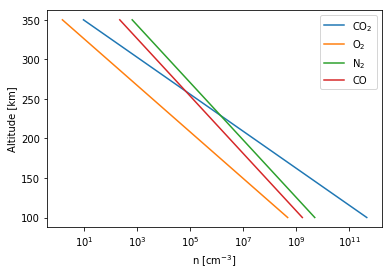

In [12]:
# Number density coefficients from Nier and McElroy (1977).
b_CO2=-0.042696;
b_O2=-0.033945;
b_N2=-0.027514;
b_CO=-0.027514;

a_CO2=15.930;
a_O2=12.074;
a_N2=12.452;
a_CO=11.984;
z=np.linspace(100,350,501)

mars_co2 = Species(a_CO2,b_CO2,z)
mars_o2 = Species(a_O2,b_O2,z)
mars_n2 = Species(a_N2,b_N2,z)
mars_co = Species(a_CO,b_CO,z)

mars_co2.calc_n()
mars_o2.calc_n()
mars_n2.calc_n()
mars_co.calc_n()

plt.figure() 
plt.semilogx(mars_co2.n,mars_co2.z)
plt.semilogx(mars_o2.n,mars_co2.z)
plt.semilogx(mars_n2.n,mars_co2.z)
plt.semilogx(mars_co.n,mars_co2.z)
plt.xlabel("n [cm$^{-3}$]")
plt.ylabel("Altitude [km]")
plt.legend(["CO$_2$","O$_2$","N$_2$","CO"])

Load energy dissipation distribution functions

In [ ]:
uniSr,uniLambda=np.genfromtxt("Energy_deposition_unidirectional.txt", unpack=True)
# Plot to confirm that it works.
plt.plot(uniSr,uniLambda)

Calcluate atmospheric scattering depth, $s(z)$